In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..") # to find kmeanstf

## kmeanstf: basic usage

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from kmeanstf import KMeansTF

In [4]:
# create data set: mixture of 4 gaussians
X = tf.random.normal([10000,2])
d = 6
X = tf.concat((X,X+[d,0],X+[0,d],X+[d,d]),axis=0)
X = tf.random.shuffle(X) # shuffle so that plotting the first 10000 points gets points from all clusters

In [5]:
# create kmeanstf object, no retries
km = KMeansTF(n_clusters=100,n_init=1,verbose=0)

## the fit() method

In [6]:
# compute cluster centers
km.fit(X)
print("Inertia=",km.inertia_)

Inertia= 5466.8457


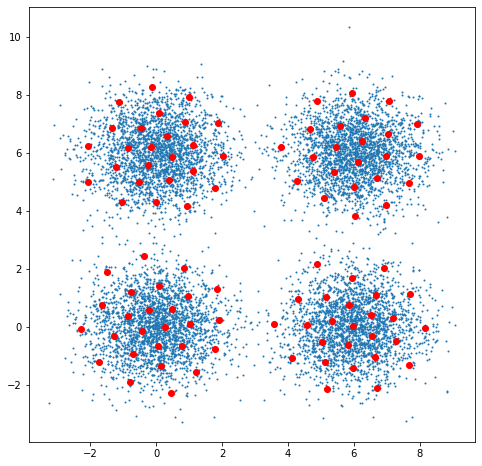

In [7]:
# plot result
m=10000 # max number of data points to display
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:m,0],X[:m,1],s=1)
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=6*6,c="r")
plt.show()

## the predict() method

In [8]:
# predict current cluster centers (should result in range(n_clusters))
km.predict(km.cluster_centers_)

<tf.Tensor: id=43241, shape=(100,), dtype=int64, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])>

## the fit_predict() method

In [9]:
# compute cluster centers and determine closest center for each data point in X
km.fit_predict(X)

<tf.Tensor: id=77789, shape=(40000,), dtype=int64, numpy=array([69, 43, 46, ..., 26, 75, 10])>

## effect of the tol parameter

In [10]:
# in general: the smaller the tol parameter, the lower the inertia and the higher the number of required iterations
for tol in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
    km = KMeansTF(n_clusters=30,n_init=1,verbose=0, tol=tol)
    km.fit(X)
    print("tol ={:f} inertia={:f} n_iter = {:d}".format(tol,km.inertia_,km.n_iter_))

tol =0.100000 inertia=17789.562500 n_iter = 2
tol =0.010000 inertia=17430.160156 n_iter = 4
tol =0.001000 inertia=16617.333984 n_iter = 12
tol =0.000100 inertia=16717.072266 n_iter = 30
tol =0.000010 inertia=16565.539062 n_iter = 61
